<a href="https://colab.research.google.com/github/batuhanyndny/notebooks/blob/master/maleria_detection_with_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TOB & MAI Workshop 

```
# Maleria cell detection 
```



# What is Maleria

<h1>Symptoms</h1>

Doctors divide malaria symptoms into two categories: 
 * Uncomplicated  
 * severe malaria

<div id='left'>
<img src="https://raw.githubusercontent.com/TYZAUM/TOB-WS/master/Maleria_for_medicine_undergrads/malaria-is-passed-on-by-the-anopheles-mosquito.jpg?width=200px;height=200px;" width="300"/>
</div>
<hr>
<div id='right'>
  <p> <strong>Malaria is passed on by the Anopheles mosquito. </strong></p>
</div>

<h1>Uncomplicated malaria</h1>
<div>
The Anopheles mosquito passes on malaria.
Malaria is passed on by the Anopheles mosquito.

A doctor would give this diagnosis when symptoms are present, but no symptoms occur that suggest severe infection or dysfunction of the vital organs.

This form can become severe malaria without treatment, or if the host has poor or no immunity.

Symptoms of uncomplicated malaria typically last <strong> 6 to 10 hours and recur every second day.</strong>


Some strains of the parasite can have a longer cycle or cause mixed symptoms.

As symptoms resemble those of flu, they may remain undiagnosed or misdiagnosed in areas where malaria is less common.

In uncomplicated malaria, symptoms progress as follows, through cold, hot, and sweating stages:

-    a sensation of cold with shivering
-    fever, headaches, and vomiting
-    seizures sometimes occur in younger people with the disease
-    sweats, followed by a return to normal temperature, with tiredness

In areas where malaria is common, many people recognize the symptoms as malaria and treat themselves without visiting a doctor.
</div>

<h1>Severe malaria</h1>

In severe malaria, clinical or laboratory evidence shows signs of vital organ dysfunction.

Symptoms of severe malaria include:

-    fever and chills
-    impaired consciousness
-    prostration, or adopting a prone position
-    multiple convulsions
-    deep breathing and respiratory distress
-    abnormal bleeding and signs of anemia
-    clinical jaundice and evidence of vital organ dysfunction

Severe malaria can be <strong>fatal</strong> without treatment.

<h1>Treatment</h1>

Treatment aims to eliminate the Plasmodium parasite from the bloodstream.

Those without symptoms may be treated for infection to reduce the risk of disease transmission in the surrounding population.

The World Health Organization (WHO) recommends artemisinin-based combination therapy (ACT) to treat uncomplicated malaria.

Artemisinin is derived from the plant Artemisia annua, better known as sweet wormwood. It rapidly reduces the concentration of Plasmodium parasites in the bloodstream.

Practitioners often combine ACT with a partner drug. ACT aims to reduce the number of parasites within the first 3 days of infection, while the partner drugs eliminate the rest.

Expanding access to ACT treatment worldwide has helped reduce the impact of malaria, but the disease is becoming increasingly resistant to the effects of ACT.

In places where malaria is resistant to ACT, treatment must contain an effective partner drug.

The WHO has warned that no alternatives to artemisinin are likely to become available for several years.

<h1>Diagnosis</h1>

Early diagnosis is <strong>critical</strong> for recovery from malaria.

Anyone showing signs of malaria should seek testing and treatment immediately.

The WHO strongly advise <i><strong>confirmation of the parasite through <u>microscopic laboratory testing</u> or by a <u>rapid diagnostic test </u>(RDT)</strong></i>, depending on the facilities available.

No combination of symptoms can reliably distinguish malaria from other causes, so a parasitological test is vital for identifying and managing the disease.

In some malaria-endemic areas, such as sub-Saharan Africa, the disease's severity can cause mild immunity in a large proportion of the local population.

As a result, some people carry the parasites in their bloodstream but do not fall ill.

# Maleria Detection with Machine Learning
<h2> Downloading Dataset </h2>

In [ ]:
!mkdir /root/.kaggle/
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json
!echo '{"username":"maibot","key":"6d074d5b96d5e062ee89f0330b8a4cc2"}' > /root/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle/’: File exists


In [ ]:
!kaggle datasets download -d iarunava/cell-images-for-detecting-malaria

 97% 327M/337M [00:02<00:00, 143MB/s]
100% 337M/337M [00:02<00:00, 121MB/s]


In [ ]:
!unzip cell-images-for-detecting-malaria.zip -d data/

Archive:  cell-images-for-detecting-malaria.zip
   creating: data/cell_images/
   creating: data/cell_images/Parasitized/
 extracting: data/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png  
 extracting: data/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_163.png  
 extracting: data/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_164.png  
 extracting: data/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_165.png  
 extracting: data/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_166.png  
 extracting: data/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_167.png  
 extracting: data/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_168.png  
 extracting: data/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_169.png  
 extracting: data/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_170.png  
 extracting: data/cell_images/Parasitized/C100P61ThinF_IMG_20150918_

In [ ]:
cd data/cell_images

/content/data/cell_images/data/cell_images


In [ ]:
!ls

Parasitized  Uninfected


<h1>Preprocessing</h1>

<h3>
Importing the necessary libraries
</h3>

In [ ]:
import pandas as pd #for data science
import numpy as np #numeric python 
import os #operation system
import cv2 #computer vision library
from PIL import Image #Image manipulation tool
import matplotlib.pyplot as plt #plotting tool

In [ ]:
os.listdir()

['Parasitized', 'Uninfected']

<h3> Plotting sample images </h3>

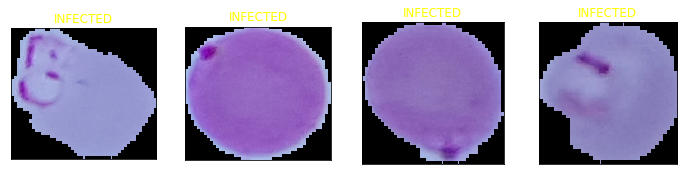

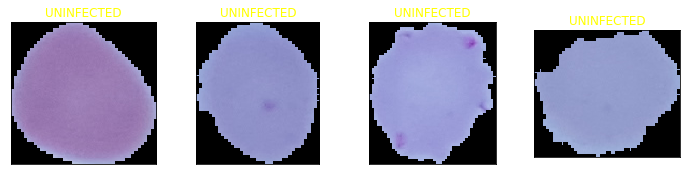

In [ ]:
infected = os.listdir("Parasitized/")
uninfected = os.listdir("Uninfected/")

infected_path = "Parasitized/"
uninfected_path = "Uninfected/"

plt.figure(figsize=(12,12))

for i in range(4):
  plt.subplot(4,4, i+1)
  
  plt.yticks([])
  plt.xticks([])
  
  plt.title('INFECTED', color='yellow')
  
  plt.imshow(cv2.imread(infected_path+infected[i]))

plt.show()

plt.figure(figsize=(12,12))

for i in range(4):
  plt.subplot(4,4, i+1)
  
  plt.subplots_adjust(wspace = 0.2 )
  plt.yticks([])
  plt.xticks([])
  
  plt.title('UNINFECTED', color='yellow')
  
  plt.imshow(cv2.imread(uninfected_path+uninfected[i]))

plt.show()

<h3> Reading every image from directory and saving them as an .npy file</h3>

<p>
  <ul>
    <li>
  We need to load our images to computer's ram so we can use them.
    </li>
    <li>
  After reading part is done we dump our <u>data array</u> and <u>label array</u> to a .npy file which is a numpy file so we can use them whenever we need.
    </li>
    </ul>
</p>

In [ ]:

data = []
labels = []

for imageOne in infected:
    try:
        img = cv2.imread(infected_path+imageOne)
        img_from_array = Image.fromarray(img, "RGB")
        size_image = img_from_array.resize((50,50))
        data.append(np.array(size_image))
        labels.append(0)
    except AttributeError:
        print("infected data loading")

for imageTwo in uninfected:
    try:
        img = cv2.imread(uninfected_path+imageTwo)
        img_from_array = Image.fromarray(img, "RGB")
        size_image = img_from_array.resize((50,50))
        data.append(np.array(size_image))
        labels.append(1)
    except AttributeError:
        print("Uninfected data loading")
        
Dataset = np.array(data)
Labels = np.array(labels)

np.save("50by50Dataset",Dataset)
np.save("50by50Labels",Labels)


infected data loading
Uninfected data loading


<h2> We got our data files, now its time for splitting data to <u> train</u> and <u>test</u> parts </h2> <hr>

cool but what is a train and test parts ?

<div>
  <h2> Train Test Split </h2>
  <img src='https://raw.githubusercontent.com/TYZAUM/TOB-WS/master/Maleria_for_medicine_undergrads/train_test_split.png' width=500px>
</div>

In [ ]:
from keras.utils import np_utils, to_categorical
import keras

loaded_dataset = np.load("50by50Dataset.npy")
loaded_labels = np.load("50by50Labels.npy")

num_classes=len(np.unique(loaded_labels))

from sklearn.model_selection import train_test_split #importing train_test_split method

# splitting to test and train/valid parts
x_, x_test , y_, y_test = train_test_split(loaded_dataset, loaded_labels, test_size=0.2, random_state=42)

#splitting to train and valid parts
x_train, x_valid, y_train, y_valid = train_test_split(x_, y_, test_size=0.2, random_state=42)

# normalize our data
#in other words 
x_train = x_train.astype('float32')/255 #Normalize
x_test = x_test.astype('float32')/255
x_valid = x_valid.astype('float32')/255


# Here we categorize our data with to_categorical 
# Which returns (num_examples,num_classes) shaped array           # exmpl
# Turns 0 and 1 to ( [1,0] for 0 ) and ( [0,1] for 1 )            #  efected |
y_train=keras.utils.to_categorical(y_train,num_classes)           #  yes     |[ [0,1]
y_valid=keras.utils.to_categorical(y_valid,num_classes)           #  no      |  [1,0]
y_test=keras.utils.to_categorical(y_test,num_classes)             #  yes     |  [0,1] ]

<h1>  </h1>

In [ ]:
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.models import Sequential

model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(50,50,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(2,activation="softmax"))#2 represent output layer neurons 
model.summary()


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

fitted = model.fit(x_train,y_train,
                   validation_data=(x_valid, y_valid)
                   batch_size=50,
                   epochs=20,
                   verbose=1)

accuracy = model.evaluate(x_test, y_test, verbose=1)
print('\n', 'Test_Accuracy:-', accuracy[1])



from keras.models import load_model
model.save('weights_for_50px.h5')



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 50, 50, 16)        208       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 25, 25, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 25, 25, 32)        2080      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 12, 12, 64)        8256      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2304)              0         
__________

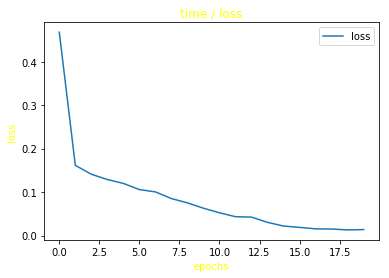

In [ ]:
plt.plot(range(20),fitted.history['loss'])
plt.title('time / loss', color='yellow')
plt.xlabel('epochs', color='yellow')
plt.ylabel('loss', color='yellow')
plt.legend(['loss'], loc='upper right')
plt.show()
#plt.plot(range(20), fitted.history['acc'])

In [ ]:
result = model.evaluate(x_test, y_test)

2755/2755 [==============================] - 2s 750us/step


In [ ]:
#%% prediction func
def convert_to_array(img):
    im = cv2.imread(img)
    im = cv2.resize(im, (50, 50))
    return np.array(im)
def get_cell_name(label):
    if label==0:
        return "Paracitized"
    if label==1:
        return "Uninfected"
def predict_image(file):
    model = load_model('weights_for_50px.h5')
    print("Predicting Image.................................")
    ar=convert_to_array(file)
    ar=ar/255
    a=[]
    a.append(ar)
    a=np.array(a)
    score=model.predict(a,verbose=1)
    print(score)
    label_index=np.argmax(score)
    print(label_index)
    acc=np.max(score)
    Cell=get_cell_name(label_index)
    return "The predicted Image is a "+Cell+" with accuracy =  "+str(acc)

In [ ]:
os.listdir(infected_path)[3:7]

['C84P45ThinF_IMG_20150818_104156_cell_120.png',
 'C97P58ThinF_IMG_20150917_151320_cell_144.png',
 'C158P119ThinF_IMG_20151115_181436_cell_202.png',
 'C182P143NThinF_IMG_20151201_172257_cell_197.png']

In [ ]:
predict_image(infected_path+'C84P45ThinF_IMG_20150818_104156_cell_120.png')

Predicting Image.................................
1/1 [==============================] - 0s 296ms/step
[[1.0000000e+00 1.2803907e-12]]
0


'The predicted Image is a Paracitized with accuracy =  1.0'

<div>
  <h2>EARLY STOPPING</h2>
<img src='https://raw.githubusercontent.com/sg2/intro/master/8-EarlyStopping/images/early_stopping.png' width=700px>
</div>